### NSP Cases



Here are the libraries / configurations used.

In [1]:
import abm_scheduling
from abm_scheduling import Schedule as Schedule
from abm_scheduling import Nurse as Nurse

### Case - No weekends

In [2]:
#%% Initializations
p_to_accept_negative_change = .001

# Situation definition
matrix_nurses_needed = [5,8,5, 4,7,4, 4,7,4, 4,7,5, 5,7,7, 6,7,8, 7,5,5]
matrix_nurse_availability_type1 = ['x','x','', 'x','x','',  'x','x','', 'x','x','', 'x','x','', '','','', '','','']
matrix_nurse_availability_type2 = ['x','x','x', 'x','x','x',  'x','x','x', 'x','x','x', 'x','x','x', '','','', '','','']

# Create Schedule
#schedule_random = Schedule(matrix_nurses_needed=matrix_nurses_needed, is_random=False)
schedule = Schedule(num_nurses_needed=3)

# Create model and nurses
model = abm_scheduling.NSP_AB_Model()
#nurses = model.generate_nurses(10, 0.5, True)
list_nurse_schedules = []
list_nurse_schedules.append(matrix_nurse_availability_type1)
list_nurse_schedules.append(matrix_nurse_availability_type1)
list_nurse_schedules.append(matrix_nurse_availability_type1)
list_nurse_schedules.append(matrix_nurse_availability_type1)
list_nurse_schedules.append(matrix_nurse_availability_type1)
list_nurse_schedules.append(matrix_nurse_availability_type2)
list_nurse_schedules.append(matrix_nurse_availability_type2)
list_nurse_schedules.append(matrix_nurse_availability_type2)
list_nurse_schedules.append(matrix_nurse_availability_type2)
list_nurse_schedules.append(matrix_nurse_availability_type2)
nurses = model.generate_nurses_from_nurse_schedules(list_nurse_schedules)
schedule.print_schedule(schedule_name="Intial Situation")

Week's Schedule Intial Situation
+---------+----------+----------+----------+----------+----------+----------+----------+
|         | Mo       | Tu       | We       | Th       | Fr       | Sa       | So       |
+---------+----------+----------+----------+----------+----------+----------+----------+
| shift 1 | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
| shift 2 | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
| shift 3 | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
+---------+----------+----------+----------+----------+----------+----------+----------+


In [3]:
model.show_hypothetical_max_schedule(schedule=schedule, nurses=nurses)

Week's Schedule Hypothetical Maximum
+---------+----------+----------+----------+----------+----------+----------+----------+
|         | Mo       | Tu       | We       | Th       | Fr       | Sa       | So       |
+---------+----------+----------+----------+----------+----------+----------+----------+
| shift 1 | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
|         | 0,1,2,3, | 0,1,2,3, | 0,1,2,3, | 0,1,2,3, | 0,1,2,3, |          |          |
|         | 4,5,6,7, | 4,5,6,7, | 4,5,6,7, | 4,5,6,7, | 4,5,6,7, |          |          |
|         | 8,9      | 8,9      | 8,9      | 8,9      | 8,9      |          |          |
| shift 2 | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
|         | 0,1,2,3, | 0,1,2,3, | 0,1,2,3, | 0,1,2,3, | 0,1,2,3, |       

In [4]:
best_schedule, utility_each_timestep, shift_coverage_each_timestep = model.run(schedule=schedule, nurses=nurses, p_to_accept_negative_change=p_to_accept_negative_change)

Week's Schedule Best Schedule
+---------+----------+----------+----------+----------+----------+----------+----------+
|         | Mo       | Tu       | We       | Th       | Fr       | Sa       | So       |
+---------+----------+----------+----------+----------+----------+----------+----------+
| shift 1 | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
|         | 9,4,2    | 9,3,4    | 0,7,1    | 1,8,2    | 8,3,1    |          |          |
| shift 2 | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
|         | 6,3,0    | 2,1,5    | 4,6,3    | 0,3,4    | 5,4,0    |          |          |
| shift 3 | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nu

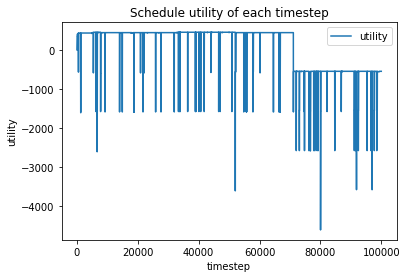

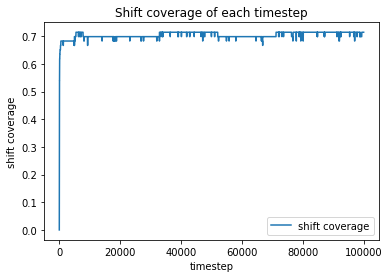

In [5]:
model.plot_utility_per_timestep(utility_each_timestep)
model.plot_shift_coverage_per_timestep(shift_coverage_each_timestep)


### Case 2 randoms

In [ ]:
schedule = Schedule(num_nurses_needed=3)
candidate_schedule = copy.deepcopy(schedule)
best_schedule = copy.deepcopy(schedule)
best_utility = 0
nurses = generate_nurses(10, 0.5, True)
p_to_accept_negative_change = .001
# show what all shift preferences look like in the schedule
hypothetical_max_schedule = copy.deepcopy(schedule)
for nurse in nurses:
    for shift in nurse.shift_preferences:
        hypothetical_max_schedule.add_nurse_to_shift(nurse, shift, False)
        
schedule.print_schedule()
hypothetical_max_schedule.print_schedule()
print('Crude hypothetical shift coverage:', hypothetical_max_schedule.get_shift_coverage())

utility_each_timestep = []
shift_coverage_each_timestep = []
# timestep is for each nurse, so total timesteps = x * num_nurses where x is range(x)
for timestep in range(10000):
    for nurse in nurses:
        schedule_utility = schedule.get_utility()
        utility_each_timestep.append(schedule_utility)
        shift_coverage_each_timestep.append(schedule.get_shift_coverage())
        # keep track of best utility
        if schedule_utility > best_utility:
            best_schedule.schedule = copy.deepcopy(schedule.schedule)
            best_utility = schedule_utility
        rnd_i = rnd.randint(len(nurse.shift_preferences))
        rnd_shift_pref = nurse.shift_preferences[rnd_i]
        was_in_shift = rnd_shift_pref in nurse.shifts
        # try adding/removing shift depending on whether the shift is assigned
        if not was_in_shift:
            candidate_schedule.add_nurse_to_shift(nurse, rnd_shift_pref, False)
        else:
            candidate_schedule.remove_nurse_from_shift(nurse, rnd_shift_pref, False)
        # if the change was better or randomly accept negative change, apply change to schedule
        if (candidate_schedule.get_utility() > schedule_utility) or (rnd.random_sample() < p_to_accept_negative_change):
            if not was_in_shift:
                schedule.add_nurse_to_shift(nurse, rnd_shift_pref, True)
            else:
                schedule.remove_nurse_from_shift(nurse, rnd_shift_pref, True)
        # if the change was worse, undo the change to the candidate schedule
        else:
            if not was_in_shift:
                candidate_schedule.remove_nurse_from_shift(nurse, rnd_shift_pref, False)
            else:
                candidate_schedule.add_nurse_to_shift(nurse, rnd_shift_pref, False)

best_schedule.print_schedule()
print('Solution shift coverage:',best_schedule.get_shift_coverage())
print('Solution utility', best_schedule.get_utility())

plt.figure()
plt.plot(utility_each_timestep, label = "utility")
plt.title("Schedule utility of each timestep")
plt.xlabel("timestep")
plt.ylabel("utility")
plt.legend()
plt.show()

plt.figure()
plt.plot(shift_coverage_each_timestep, label = "shift coverage")
plt.title("Shift coverage of each timestep")
plt.xlabel("timestep")
plt.ylabel("shift coverage")
plt.legend()
plt.show()